# This notebook analyzes credit card customer behavior using spend, repayment, and acquisition data.

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading the datasets

In [2]:
customer_acquisition = pd.read_csv('Customer Acqusition.csv')
spend = pd.read_csv('spend.csv')
repayment = pd.read_csv('Repayment.csv')
print(f'Customer Acquisition dataset size = {customer_acquisition.shape}')
print(f'Spend dataset size = {spend.shape}')
print(f'Repayment dataset size = {repayment.shape}')

Customer Acquisition dataset size = (100, 8)
Spend dataset size = (1500, 5)
Repayment dataset size = (1523, 5)


### Exploring the Customer Acquistion dataset

In [3]:
customer_acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
customer_acquisition.tail()

,No,Customer,Age,City,Product,Limit,Company,Segment
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed
99,100,A100,36,COCHIN,Silver,100000.0,C5,Salaried_MNC


In [5]:
customer_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


The customer acquisition dataset contains the data for 100 customers with information about their age, city, card type, card limit, company and segment.

In [6]:
customer_acquisition.drop('No',axis = 1,inplace = True) # Dropping 'No' column since it is basically the same as the index.

In [7]:
# checking for duplicated data
customer_acquisition.duplicated().sum()

0

An output of 0 indicates there are no duplicated data

### Exploring the Spend dataset

In [8]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [9]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


This dataset contains information about the customer's daily spending and the products the purchase  

In [10]:
spend.drop('Sl No:',axis = 1,inplace = True) # Dropping 'SI No' column since it is the same as the index column

In [11]:
# Checking for duplicates in the Spend dataset
spend.duplicated().sum()

0

### Exploring the Repayment dataset

In [12]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [13]:
repayment.tail()

,SL No:,Customer,Month,Amount,Unnamed: 4
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN
1522,NaN,NaN,NaN,NaN,NaN


In [14]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


The repayment dataset has an unnamed column which contains NaN values and it seems this column contains more values (1523) than the rest of the columns (1500)

In [15]:
repayment.drop(columns= ['SL No:','Unnamed: 4'],inplace = True) # Dropping both columns because the are not relevant to the dataset

In [16]:
repayment.isna().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [17]:
repayment.dropna(inplace = True)  # Dropping all NaN rows created by the unnamed column

In [18]:
repayment.duplicated().sum()

0

## Changing the currency from Indian Rupees to USD

The credit card dataset was obtained from specific cities in India but I am changing the currency to USD because it is a more global currency and can be understood by all

In [19]:
customer_acquisition['limit_USD'] = customer_acquisition['Limit'] * 0.012
spend['Amount_USD'] = spend['Amount'] * 0.012
repayment['Amount_USD'] = repayment['Amount'] * 0.012

## Dropping the columns that contain Indian currency

In [20]:
customer_acquisition.drop('Limit',axis = 1,inplace = True)
spend.drop('Amount',axis = 1,inplace = True)
repayment.drop('Amount',axis = 1,inplace = True)

### Changing the date format of the Month columns in __spend__ and __repayment__ using pd.to_datetime 

In [21]:
spend['Month'] = pd.to_datetime(spend['Month'],format='%d-%b-%y')
spend['Month'] = spend['Month'].dt.to_period('M').dt.to_timestamp() # Aggregating into Months

In [22]:
repayment['Month'] = pd.to_datetime(repayment['Month'],format='%d-%b-%y')
repayment['Month'] = repayment['Month'].dt.to_period('M').dt.to_timestamp() # Aggregating into Months

### Merging __spend__ and __repayment__ with __customer acquisition__

Mergind both spend and repayment dataset with customer acquisition to be able to make more inherences regarding age, city, limit and Segment

In [23]:
spend_merged = pd.merge(spend,customer_acquisition, on = 'Customer',how='left')
repayment_merged = pd.merge(repayment,customer_acquisition,on = 'Customer',how ='left')

In [24]:
repayment_merged.head()

,Customer,Month,Amount_USD,Age,City,Product,Company,Segment,limit_USD
0,A1,2004-01-01,5944.97700,76,BANGALORE,Gold,C1,Self Employed,6000.0
1,A1,2004-01-01,2950.78824,76,BANGALORE,Gold,C1,Self Employed,6000.0
2,A1,2004-01-01,3113.88072,76,BANGALORE,Gold,C1,Self Employed,6000.0
3,A1,2004-01-01,5250.66144,76,BANGALORE,Gold,C1,Self Employed,6000.0
4,A1,2005-01-01,1991.67456,76,BANGALORE,Gold,C1,Self Employed,6000.0


In [25]:
spend_merged.head()

,Customer,Month,Type,Amount_USD,Age,City,Product,Company,Segment,limit_USD
0,A1,2004-01-01,JEWELLERY,5825.64960,76,BANGALORE,Gold,C1,Self Employed,6000.0
1,A1,2004-01-01,PETRO,4926.67356,76,BANGALORE,Gold,C1,Self Employed,6000.0
2,A1,2004-01-01,CLOTHES,284.88552,76,BANGALORE,Gold,C1,Self Employed,6000.0
3,A1,2004-01-01,FOOD,5812.10964,76,BANGALORE,Gold,C1,Self Employed,6000.0
4,A1,2005-01-01,CAMERA,4436.32884,76,BANGALORE,Gold,C1,Self Employed,6000.0


### A graph of Expense by city

Text(0, 0.5, 'Amount_USD')

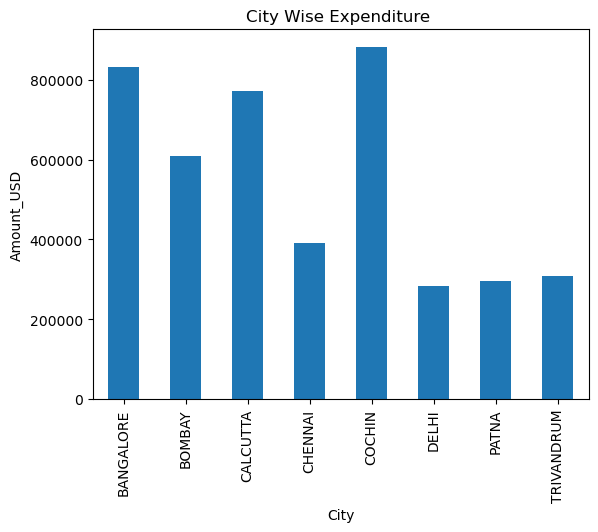

In [26]:
city_spend = spend_merged.groupby('City')['Amount_USD'].sum()
city_spend.plot(kind = 'bar',title = 'City Wise Expenditure ')
plt.ylabel('Amount_USD')

This plot shows us that most top spenders are situated in COCHIN and BANGALORE. This could mean higher average transaction values(luxury/lifestyle spending) and also greater credit card adoption in the commercial sectors as compared to cities like DELHI. However, this illustration contradicts with real life as DELHI is more costly in terms of living expenditure than COCHIN

### A graph of total repayment by segemnts

Text(0, 0.5, 'Amount_USD')

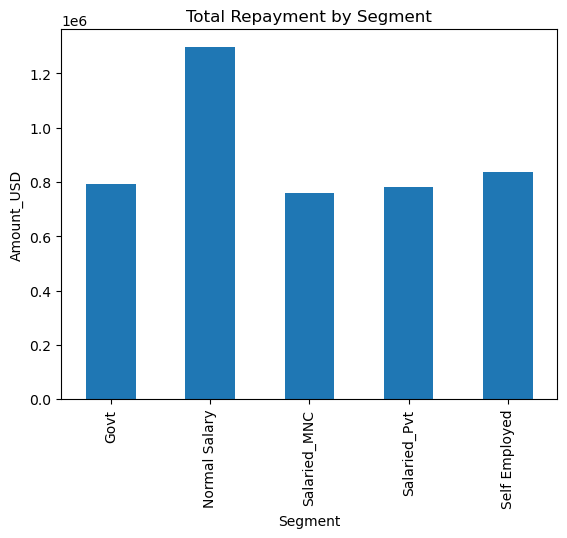

In [27]:
segment_repay = repayment_merged.groupby('Segment')['Amount_USD'].sum()
segment_repay.plot(kind = 'bar',title = 'Total Repayment by Segment')
plt.ylabel('Amount_USD')

This plot tells us that people that earn normal salaries potentially repay all their card debts as compared to the other segments.

### Feature Engineering
Monthly spend and repayment summary

In [28]:
monthly_spend = spend_merged.groupby(['Customer', 'Month'])['Amount_USD'].sum().reset_index(name='monthly_spend')
monthly_repay = repayment_merged.groupby(['Customer','Month'])['Amount_USD'].sum().reset_index(name = 'monthly_repay')

In [29]:
# Merging both summaries
behavior_df = pd.merge(monthly_spend, monthly_repay, on=['Customer', 'Month'], how='outer').fillna(0)

In [30]:
# Adding credit limit from acquisition
behavior_df = pd.merge(behavior_df, customer_acquisition[['Customer', 'limit_USD']], on='Customer', how='left')

In [31]:
# Derived metrics
behavior_df['utilization_ratio'] = behavior_df['monthly_spend'] / behavior_df['limit_USD']
behavior_df['repayment_ratio'] = behavior_df['monthly_repay'] / behavior_df['monthly_spend'].replace(0, np.nan)
behavior_df['over_limit_flag'] = (behavior_df['monthly_spend'] > behavior_df['limit_USD']).astype(int)


In [32]:
behavior_df

,Customer,Month,monthly_spend,monthly_repay,limit_USD,utilization_ratio,repayment_ratio,over_limit_flag
0,A1,2004-01-01,26875.72848,26902.00092,6000.000,4.479288,1.000978,1
1,A1,2004-02-01,626.50380,1415.57316,6000.000,0.104417,2.259481,0
2,A1,2004-05-01,4333.69572,0.00000,6000.000,0.722283,0.000000,0
3,A1,2005-01-01,4436.32884,1991.67456,6000.000,0.739388,0.448947,0
4,A1,2005-02-01,9887.63760,7966.91244,6000.000,1.647940,0.805745,1
...,...,...,...,...,...,...,...,...
1097,A95,2004-01-01,2884.81800,4432.87152,6000.000,0.480803,1.536621,0
1098,A96,2004-01-01,656.75592,3731.90760,1200.000,0.547297,5.682336,0
1099,A97,2004-01-01,1668.21912,1462.49880,120.000,13.901826,0.876683,1
1100,A98,2004-01-01,3414.25272,4053.78684,120.012,28.449261,1.187313,1


## EXPLORATORY DATA ANALYSIS

<Figure size 1000x500 with 0 Axes>

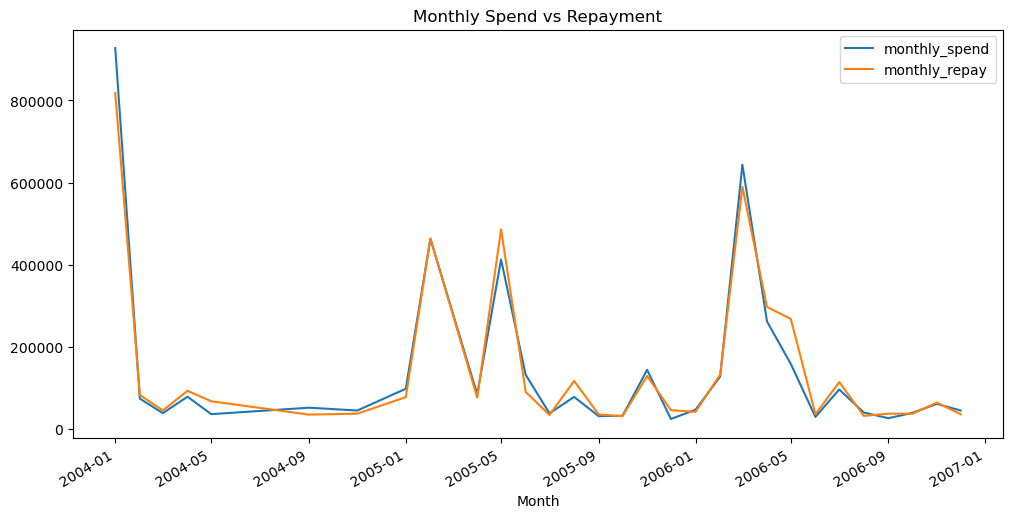

In [33]:
# Spend trends
plt.figure(figsize=(10, 5))
monthly_trend = behavior_df.groupby('Month')[['monthly_spend', 'monthly_repay']].sum()
monthly_trend.plot(title='Monthly Spend vs Repayment', figsize=(12, 6));

The lines for monthly spend and monthly repayment follow a similar pattern, indicating that customers generally attempt to repay a consistent portion of what they spend. This reflects a level of financial responsibility across the customer base. There is a sharp spike in both spending and repayment at the beginning of the dataset, this may reflect a large-scale onboarding if customers or promotional credit usage. Despite high spending, repayment is also equally high.
In the Mid-2004 to Early-2005 both spending and repayment drop and stabilize.
Around mid-2005 and early 2006, there are significant spikes in spending with repayment lagging slightly.

Text(0.5, 1.0, 'Distribution of Credit Utilization Ratios')

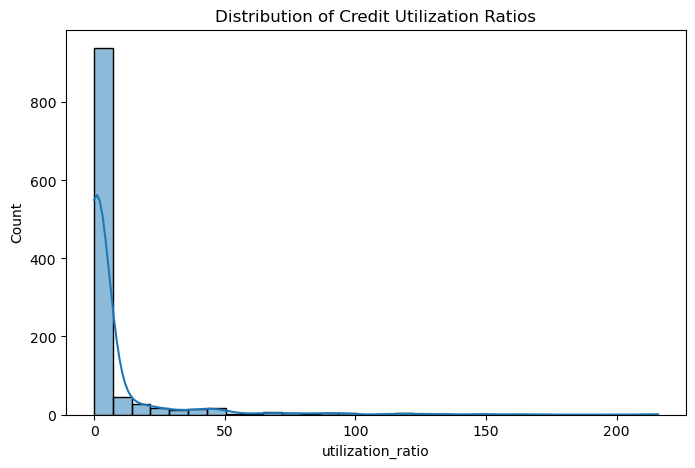

In [34]:
# Utilization distribution
plt.figure(figsize=(8, 5))
sns.histplot(behavior_df['utilization_ratio'], bins=30, kde=True)
plt.title('Distribution of Credit Utilization Ratios')

Highly Skewed Distribution
The majority of customers have a utilization ratio clustered near 0–5, suggesting conservative credit usage.This indicates a large portion of the customer base is not heavily reliant on credit, which may reflect strong financial health or credit underutilization.

Long Right Tail (Heavy Users)
A significant long tail stretches beyond 100%, with some values exceeding 200% utilization.
These extreme values suggest that some customers are spending well beyond their available credit limits.

<Axes: title={'center': 'Total Repayment by Card Product'}, xlabel='Product'>

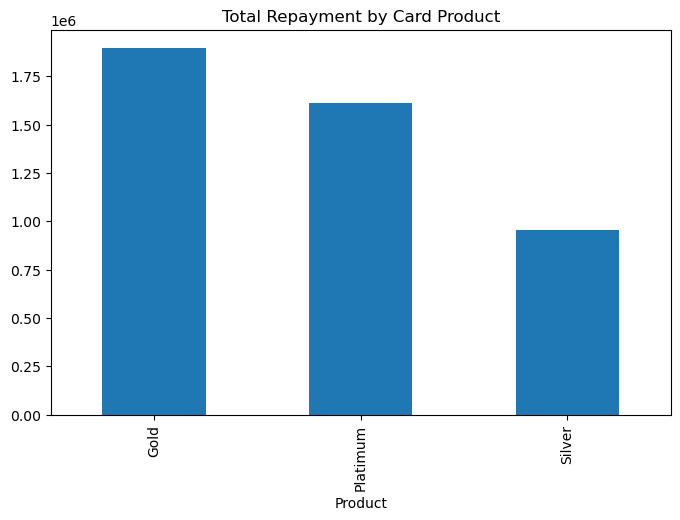

In [35]:
# Repayment behavior by product
repayment_merged['repayment'] = repayment_merged['Amount_USD']
product_repay = repayment_merged.groupby('Product')['repayment'].sum().sort_values(ascending=False)
product_repay.plot(kind='bar', title='Total Repayment by Card Product', figsize=(8, 5))

The Silver, Gold, and Platinum credit cards represent the entry-level, mid-tier, and premium tiers, respectively. Silver credit cards are for first-time credit card holders with low to moderate income. Gold cards are for middle-income earners or those with good credit history. Platinum cards are for high-income earners and premium customers. From this plot, we can see the Gold cardholders have a higher repayment amount than both Platinum and Silver, which proves the oint of them having really good credit history.

### Determining which customers have the highest monthly expense

In [36]:
top_spenders = (
    behavior_df.groupby('Customer')['monthly_spend']
    .sum().sort_values(ascending=False).head(10).reset_index())

In [37]:
top_spenders.set_index('Customer',inplace = True)

Text(0, 0.5, 'Monthly Expense')

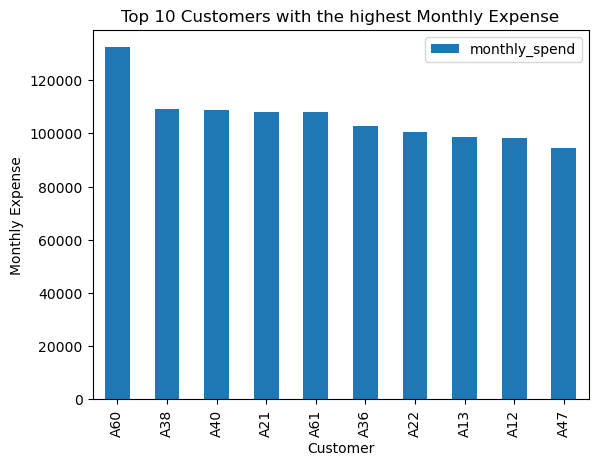

In [38]:
top_spenders.plot(kind = 'bar',title = 'Top 10 Customers with the highest Monthly Expense')
plt.ylabel('Monthly Expense')